<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,1.896542e+05,1.898268e+05,6.898151e+05,-4.999883e+05
1,0.0,1.0,44.810190,46.967683,81.913998,6.793267e+05,6.795104e+05,-2.610344e+05,9.405447e+05
2,0.0,2.0,89.719961,65.800482,63.419557,3.552268e+06,3.552497e+06,-1.003386e+06,4.555882e+06
3,0.0,3.0,99.969317,45.799765,35.667810,7.527535e+05,7.529450e+05,-7.790265e+05,1.531971e+06
4,0.0,4.0,33.611377,56.777825,62.400649,3.645173e+05,3.646801e+05,-1.288315e+06,1.652995e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,6.869081e+06,6.869254e+06,1.610179e+06,5.259075e+06
59996,999.0,56.0,70.765481,74.589813,42.649245,-3.644347e+06,-3.644149e+06,8.480439e+04,-3.728953e+06
59997,999.0,57.0,88.257994,25.363246,45.498839,2.788042e+05,2.789733e+05,-9.209117e+05,1.199885e+06
59998,999.0,58.0,79.065187,78.384294,96.039341,8.433274e+06,8.433537e+06,-2.265896e+06,1.069943e+07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,1.896542e+05,1.898268e+05,6.898151e+05,-4.999883e+05
1,0.0,1.0,44.810190,46.967683,81.913998,6.793267e+05,6.795104e+05,-2.610344e+05,9.405447e+05
2,0.0,2.0,89.719961,65.800482,63.419557,3.552268e+06,3.552497e+06,-1.003386e+06,4.555882e+06
3,0.0,3.0,99.969317,45.799765,35.667810,7.527535e+05,7.529450e+05,-7.790265e+05,1.531971e+06
4,0.0,4.0,33.611377,56.777825,62.400649,3.645173e+05,3.646801e+05,-1.288315e+06,1.652995e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,6.869081e+06,6.869254e+06,1.610179e+06,5.259075e+06
59996,999.0,56.0,70.765481,74.589813,42.649245,-3.644347e+06,-3.644149e+06,8.480439e+04,-3.728953e+06
59997,999.0,57.0,88.257994,25.363246,45.498839,2.788042e+05,2.789733e+05,-9.209117e+05,1.199885e+06
59998,999.0,58.0,79.065187,78.384294,96.039341,8.433274e+06,8.433537e+06,-2.265896e+06,1.069943e+07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    42.180882  29.019275  ...  6.898151e+05 -4.999883e+05
      1.0    44.810190  46.967683  ... -2.610344e+05  9.405447e+05
      2.0    89.719961  65.800482  ... -1.003386e+06  4.555882e+06
      3.0    99.969317  45.799765  ... -7.790265e+05  1.531971e+06
      4.0    33.611377  56.777825  ... -1.288315e+06  1.652995e+06
...                ...        ...  ...           ...           ...
999.0 55.0   53.113612  88.414639  ...  1.610179e+06  5.259075e+06
      56.0   70.765481  74.589813  ...  8.480439e+04 -3.728953e+06
      57.0   88.257994  25.363246  ... -9.209117e+05  1.199885e+06
      58.0   79.065187  78.384294  ... -2.265896e+06  1.069943e+07
      59.0   50.245971  32.716929  ... -5.180046e+05  6.231590e+05

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    42.180882  29.019275  ...  6.898151e+05 -4.999883e+05
      1.0    44.810190  46.967683  ... -2.610344e+05  9.405447e+05
      2.0    89.719961  65.800482  ... -1.003386e+06  4.555882e+06
      3.0    99.969317  45.799765  ... -7.790265e+05  1.531971e+06
      4.0    33.611377  56.777825  ... -1.288315e+06  1.652995e+06
...                ...        ...  ...           ...           ...
999.0 55.0   53.113612  88.414639  ...  1.610179e+06  5.259075e+06
      56.0   70.765481  74.589813  ...  8.480439e+04 -3.728953e+06
      57.0   88.257994  25.363246  ... -9.209117e+05  1.199885e+06
      58.0   79.065187  78.384294  ... -2.265896e+06  1.069943e+07
      59.0   50.245971  32.716929  ... -5.180046e+05  6.231590e+05

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,1.896542e+05,1.898268e+05,6.898151e+05,-4.999883e+05
1,0.0,1.0,44.810190,46.967683,81.913998,6.793267e+05,6.795104e+05,-2.610344e+05,9.405447e+05
2,0.0,2.0,89.719961,65.800482,63.419557,3.552268e+06,3.552497e+06,-1.003386e+06,4.555882e+06
3,0.0,3.0,99.969317,45.799765,35.667810,7.527535e+05,7.529450e+05,-7.790265e+05,1.531971e+06
4,0.0,4.0,33.611377,56.777825,62.400649,3.645173e+05,3.646801e+05,-1.288315e+06,1.652995e+06
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,6.869081e+06,6.869254e+06,1.610179e+06,5.259075e+06
59996,999.0,56.0,70.765481,74.589813,42.649245,-3.644347e+06,-3.644149e+06,8.480439e+04,-3.728953e+06
59997,999.0,57.0,88.257994,25.363246,45.498839,2.788042e+05,2.789733e+05,-9.209117e+05,1.199885e+06
59998,999.0,58.0,79.065187,78.384294,96.039341,8.433274e+06,8.433537e+06,-2.265896e+06,1.069943e+07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    42.180882  29.019275  ...  6.898151e+05 -4.999883e+05
      1.0    44.810190  46.967683  ... -2.610344e+05  9.405447e+05
      2.0    89.719961  65.800482  ... -1.003386e+06  4.555882e+06
      3.0    99.969317  45.799765  ... -7.790265e+05  1.531971e+06
      4.0    33.611377  56.777825  ... -1.288315e+06  1.652995e+06
...                ...        ...  ...           ...           ...
999.0 55.0   53.113612  88.414639  ...  1.610179e+06  5.259075e+06
      56.0   70.765481  74.589813  ...  8.480439e+04 -3.728953e+06
      57.0   88.257994  25.363246  ... -9.209117e+05  1.199885e+06
      58.0   79.065187  78.384294  ... -2.265896e+06  1.069943e+07
      59.0   50.245971  32.716929  ... -5.180046e+05  6.231590e+05

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

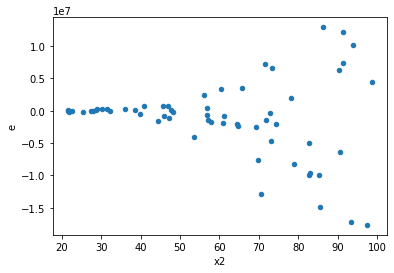

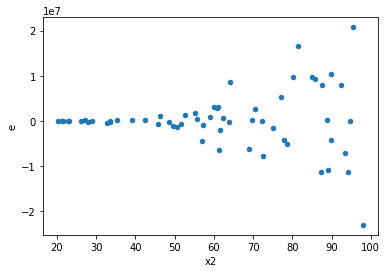

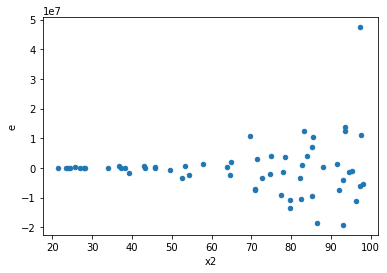

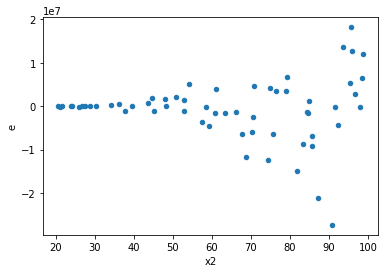

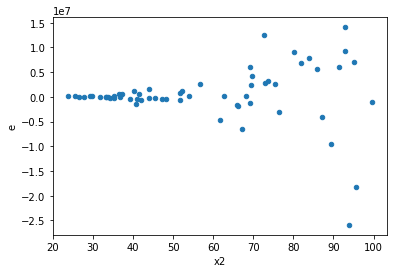

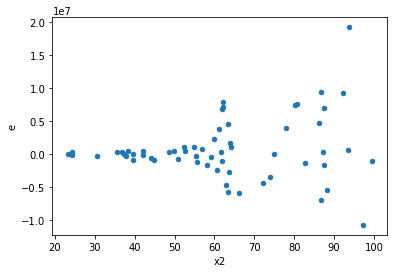

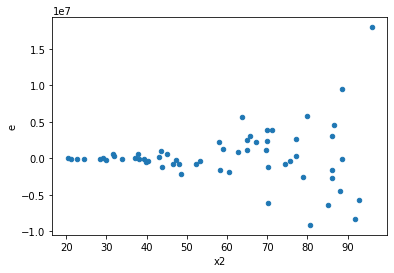

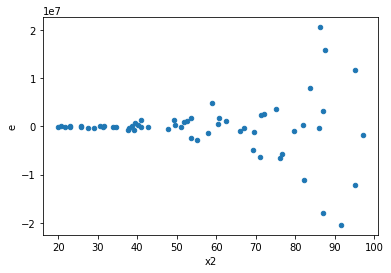

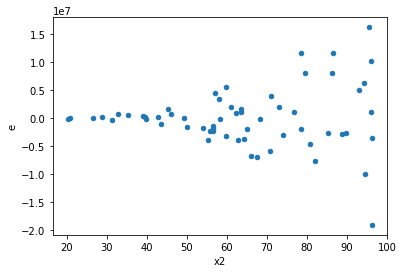

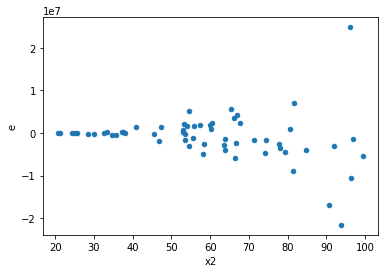

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,1928645704625742.0,14694609404176.564,96432285231287.1,734730470208.8282,131.24851784611397,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,2007375385873631.2,9433126206374.676,100368769293681.56,471656310318.73376,212.8006497482347,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,4185653599209328.5,22429592708257.78,209282679960466.44,1121479635412.8892,186.61300067514463,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1974176452595172.2,47284545126775.82,98708822629758.61,2364227256338.791,41.75098750135285,2.204680882300636e-12,0.9999999999988977,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1823120110313075.5,7714184396370.279,91156005515653.78,385709219818.514,236.33348862789697,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,962371301602482.6,7355033198749.047,48118565080124.13,367751659937.45233,130.84526957215692,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,752438971712709.8,7746255918082.161,37621948585635.484,387312795904.10803,97.13582660705593,4.440892098500626e-16,0.9999999999999998,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1596017739863994.8,3460255448614.746,79800886993199.73,173012772430.7373,461.2427503012627,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1388064175670871.2,56818627561630.51,69403208783543.56,2840931378081.5254,24.429737838444865,4.472293646529124e-10,0.9999999997763853,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1928645704625742.0,14694609404176.564,96432285231287.1,734730470208.8282,131.24851784611397,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,2007375385873631.2,9433126206374.676,100368769293681.56,471656310318.73376,212.8006497482347,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,4185653599209328.5,22429592708257.78,209282679960466.44,1121479635412.8892,186.61300067514463,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1974176452595172.2,47284545126775.82,98708822629758.61,2364227256338.791,41.75098750135285,2.204680882300636e-12,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1823120110313075.5,7714184396370.279,91156005515653.78,385709219818.514,236.33348862789697,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,962371301602482.6,7355033198749.047,48118565080124.13,367751659937.45233,130.84526957215692,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,752438971712709.8,7746255918082.161,37621948585635.484,387312795904.10803,97.13582660705593,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1596017739863994.8,3460255448614.746,79800886993199.73,173012772430.7373,461.2427503012627,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1388064175670871.2,56818627561630.51,69403208783543.56,2840931378081.5254,24.429737838444865,4.472293646529124e-10,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64